In [1]:
import astropy.units as u
import openpyxl
import astropy.constants as const
from numpy import pi,exp
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt

In [2]:
Gy = u.def_unit('Gy',u.J/u.kg)
mGy = u.def_unit('mGy',1e-3*Gy)
uGy = u.def_unit(r'\mu Gy',1e-6*Gy)
rad = u.def_unit('rad',100*u.erg/u.g)
Sv = u.def_unit('Sv')

## Q1

In [3]:
H = 0.5e-3*Sv
QF = 1*Sv/Gy
D = H/QF
display(D)

m = 5*u.kg
E = (D*m).to(u.J)
display(E)

eps = 50*u.keV
N = (E/eps).si
N

<Quantity 0.0005 Gy>

<Quantity 0.0025 J>

<Quantity 3.12075454e+11>

## Q2

In [4]:
Dose = 1*rad
m=5*u.kg
E = Dose*m
E.to(u.J)

<Quantity 0.05 J>

## Q4

$$
D(E)=\left(\frac{\mu_{en}(E)}{\rho}\right) E \Phi=\Phi \sum_i \left(\frac{\mu_{en}(E)}{\rho}\right)_i f_i E_i
$$

In [5]:
A = 1e-3*u.Ci
r = 10*u.cm

In [6]:
# Calculate the fulx density, neglect the air energy absorbed in the 10cm.
phi = A/(4*pi*r**2)
phi = phi.to(u.s**-1*u.cm**-2)
phi

<Quantity 29443.664472 1 / (s cm2)>

In [7]:
# use to transform data like '1x103' to '1e3'
def read_old_sci_number(str_data):
    str_data=str_data.replace('x10','e')
    str_data=str_data.replace('×10','e')
    str_data=str_data.replace('*','')
    return(float(str_data))

# use to transform data like '1+3' to '1e3'
def read_old_sci_number2(str_data):
    str_data=str_data.replace('+','e')
    str_data=str_data.replace('−','e-')
    return(float(str_data))

read_old_sci_number = np.vectorize(read_old_sci_number)
read_old_sci_number2 = np.vectorize(read_old_sci_number2)
# a= read_old_sci_number(['9.98×10-1', '1.99x10-4','2.34'])
# a

#### Photon Mass coefficients cm2g for dry air near sea level

The data comes from Table C.3 of our textbook (3rd version), I use Excel to obtian it from pdf pages.And I also use 2nd order interpolate.

In [8]:
mass_coefficient_data= pd.read_excel('photon Mass coefficients cm2g for dry air near sea level.xlsx')
mass_coefficient_data = mass_coefficient_data.drop(5)
mass_coefficient_data

,Energy(MeV),mu_c/rho,mu_ph/rho,mu_pp/rho,mu/rho,mu_tr/rho,mu_en/rho
0,0.0010,1.038−2,3.605+3,NaN,3.605+3,3.599+3,3.599+3
1,0.0015,2.116−2,1.190+3,NaN,1.190+3,1.188+3,1.188+3
2,0.0020,3.340−2,5.267+2,NaN,5.267+2,5.263+2,5.262+2
3,0.0030,5.748−2,1.616+2,NaN,1.616+2,1.615+2,1.614+2
4,0.00320,6.196−2,1.331+2,NaN,1.332+2,1.330+2,1.330+2
6,0.0040,7.770−2,7.713+1,NaN,7.721+1,7.637+1,7.636+1
7,0.0050,9.331−2,3.966+1,NaN,3.975+1,3.932+1,3.931+1
8,0.0060,1.051−1,2.288+1,NaN,2.299+1,2.271+1,2.270+1
9,0.0080,1.213−1,9.505+0,NaN,9.626+0,9.448+0,9.446+0
10,0.010,1.316−1,4.766+0,NaN,4.897+0,4.743+0,4.742+0


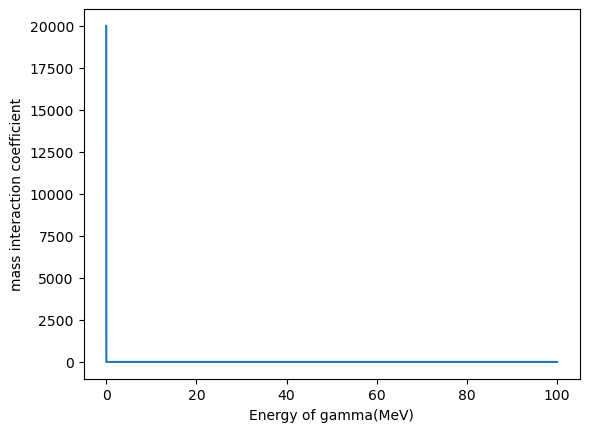

In [9]:
Energylist = mass_coefficient_data['Energy(MeV)'].values.astype(float)
Doselist = read_old_sci_number2(mass_coefficient_data['mu_en/rho'].values)
mu_en_over_rho_interp_list = interpolate.make_interp_spline(Energylist,Doselist,3)
x = np.linspace(0,100,10000)
plt.plot(x,mu_en_over_rho_interp_list(x))
plt.xlabel('Energy of gamma(MeV)')
plt.ylabel('mass interaction coefficient')
plt.show()

#### $\mathrm{^{13}N}$

In [10]:
data = pd.read_csv('mird-13N-table-0.csv',header=None)
data.columns=['Decay mode','Decay branching ratio','Energy(* for averange)','branching_ration*Energy','nothing']
data

,Decay mode,Decay branching ratio,Energy(* for averange),branching_ration*Energy,nothing
0,β+1,9.98×10-1,4.918×10-1*,4.90×10-1,NaN
1,γ±,1.99,5.109×10-1,1.01,NaN
2,Kα1 X-ray,3.53×10-6,2.770×10-4,9.78×10-10,NaN
3,Kα2 X-ray,1.67×10-6,2.770×10-4,4.63×10-10,NaN
4,Auger-K,1.85×10-3,2.600×10-4*,4.82×10-7,NaN


In [11]:
# 13N
E = read_old_sci_number(data['Energy(* for averange)'].values)[1]*u.MeV
f = read_old_sci_number(data['Decay branching ratio'].values)[1]
E

<Quantity 0.5109 MeV>

In [12]:
mu_over_rho = mu_en_over_rho_interp_list(E.value)*u.cm**2*u.g**-1
mu_over_rho

<Quantity 0.02965757 cm2 / g>

In [13]:
# Using the formula
Dose_rate = phi*f*E*mu_over_rho
Dose_rate = Dose_rate.to(Gy/u.s)
display(Dose_rate)
Dose_rate.to(mGy/u.h)

<Quantity 1.42241663e-07 Gy / s>

<Quantity 0.51206999 mGy / h>

#### $\mathrm{^{43}K}$

In [14]:
data = pd.read_csv('mird-43K-table-0.csv',header=None)
data.columns=['Decay mode','Decay branching ratio','Energy(* for averange)','branching_ration*Energy','nothing']
data

,Decay mode,Decay branching ratio,Energy(* for averange),branching_ration*Energy,nothing
0,β-1,2.60×10-2,1.430×10-1*,3.72×10-3,NaN
1,β-2,9.09×10-1,3.048×10-1*,2.77×10-1,NaN
2,β-3,4.06×10-2,4.766×10-1*,1.93×10-2,NaN
3,β-4,9.00×10-3,5.755×10-1*,5.18×10-3,NaN
4,β-5,1.54×10-2,7.691×10-1*,1.18×10-2,NaN
5,γ1,4.80×10-2,2.206×10-1,1.05×10-2,NaN
6,γ2,8.68×10-1,3.727×10-1,3.23×10-1,NaN
7,γ3,1.18×10-1,3.968×10-1,4.70×10-2,NaN
8,γ4,3.64×10-3,4.042×10-1,1.47×10-3,NaN
9,γ5,1.12×10-1,5.933×10-1,6.68×10-2,NaN


In [15]:
# 13N
result = pd.DataFrame()
result['Decay Mode'] = data['Decay mode'][5:]
E = read_old_sci_number(data['Energy(* for averange)'].values)[5:]*u.MeV
result[f'Energy({E.unit})'] = E.value
f = read_old_sci_number(data['Decay branching ratio'].values)[5:]
result['Branching Ratio'] = E.value
display(result)

,Decay Mode,Energy(MeV),Branching Ratio
5,γ1,0.2206,0.2206
6,γ2,0.3727,0.3727
7,γ3,0.3968,0.3968
8,γ4,0.4042,0.4042
9,γ5,0.5933,0.5933
10,γ6,0.6174,0.6174
11,γ7,0.8010,0.8010
12,γ8,0.9902,0.9902
13,γ9,1.0210,1.0210
14,γ10,1.3940,1.3940


In [16]:
mu_over_rho = mu_en_over_rho_interp_list(E.value)*u.cm**2*u.g**-1
result[f'mu_en/rho({mu_over_rho.unit})'] = mu_over_rho.value
display(result)

,Decay Mode,Energy(MeV),Branching Ratio,mu_en/rho(cm2 / g)
5,γ1,0.2206,0.2206,0.027247
6,γ2,0.3727,0.3727,0.029365
7,γ3,0.3968,0.3968,0.029478
8,γ4,0.4042,0.4042,0.029506
9,γ5,0.5933,0.5933,0.029545
10,γ6,0.6174,0.6174,0.029487
11,γ7,0.8010,0.8010,0.028816
12,γ8,0.9902,0.9902,0.027938
13,γ9,1.0210,1.0210,0.027788
14,γ10,1.3940,1.3940,0.025963


In [17]:
print(result.to_markdown(index=False))

| Decay Mode   |   Energy(MeV) |   Branching Ratio |   mu_en/rho(cm2 / g) |
|:-------------|--------------:|------------------:|---------------------:|
| γ1           |        0.2206 |            0.2206 |            0.0272468 |
| γ2           |        0.3727 |            0.3727 |            0.0293651 |
| γ3           |        0.3968 |            0.3968 |            0.0294776 |
| γ4           |        0.4042 |            0.4042 |            0.0295055 |
| γ5           |        0.5933 |            0.5933 |            0.0295452 |
| γ6           |        0.6174 |            0.6174 |            0.0294871 |
| γ7           |        0.801  |            0.801  |            0.0288156 |
| γ8           |        0.9902 |            0.9902 |            0.0279375 |
| γ9           |        1.021  |            1.021  |            0.0277878 |
| γ10          |        1.394  |            1.394  |            0.0259632 |


In [18]:
totallist = E*f*mu_over_rho
# display(totallist)
totalsum = (totallist).value.sum()*totallist.unit
display(totalsum)
Dose = phi*totalsum
Dose = Dose.to(Gy/u.s)
display(Dose)
Dose.to(mGy/u.h)

<Quantity 0.02829208 cm2 MeV / g>

<Quantity 1.33464907e-07 Gy / s>

<Quantity 0.48047367 mGy / h>

## Q5

A short answer question